In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_MAS = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')]

df_DA_MAS = df_DA_MAS.dropna(subset=['salary_year_avg'])

df_DA_MAS_exploded = df_DA_MAS.explode('job_skills')

df_DA_MAS_exploded[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
7931,51014.0,python
7931,51014.0,r
7931,51014.0,sql
7931,51014.0,tableau
21523,111175.0,tableau
21523,111175.0,excel
21523,111175.0,flow
22043,53014.0,sql
22043,53014.0,python
22043,53014.0,looker


In [11]:
df_DA_MAS_skills = df_DA_MAS_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_MAS_skills = df_DA_MAS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_MAS)

df_DA_MAS_skills['skill_percent'] = df_DA_MAS_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_MAS_skills_high_demand = df_DA_MAS_skills[df_DA_MAS_skills['skill_percent'] > skill_percent]

df_DA_MAS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
excel,5,111175.0,45.454545
python,5,64800.0,45.454545
sql,5,79200.0,45.454545
tableau,5,79200.0,45.454545
looker,3,79200.0,27.272727
flow,2,87987.5,18.181818
r,2,57907.0,18.181818
azure,1,111175.0,9.090909
bigquery,1,111175.0,9.090909


10 [-0.13861759 -0.58285849]
11 [0.96077078 0.43032031]


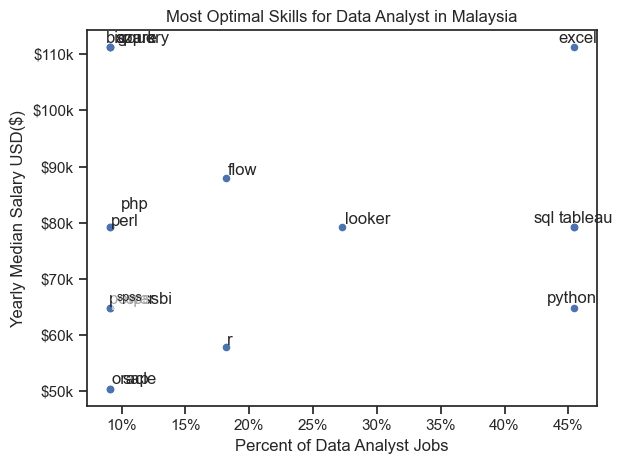

In [65]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_MAS_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_MAS_skills_high_demand.index):
    texts.append(plt.text(df_DA_MAS_skills_high_demand['skill_percent'].iloc[i], df_DA_MAS_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts)

x = df_DA_MAS_skills_high_demand['skill_percent'].iloc[i]
y = df_DA_MAS_skills_high_demand['median_salary'].iloc[i]

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.annotate(
    txt,
    (x, y),
    xytext=(5, 5),          
    textcoords='offset points',
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Yearly Median Salary USD($)')
plt.title('Most Optimal Skills for Data Analyst in Malaysia')

plt.tight_layout()
plt.show()